In [ ]:
!pip install  transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
!pip install datasets
from huggingface_hub import list_datasets
pip install fsspec==2023.6.0


In [ ]:
all_datasets = list_datasets()

In [ ]:
'dair-ai/emotion' in all_datasets

False

In [ ]:
pip install fsspec==2023.6.0

In [ ]:
from datasets import load_dataset

emotion = load_dataset("dair-ai/emotion")
emotion.set_format(type='pandas')

df = emotion['train'][:]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotion

DatasetDict({
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
#the lables

classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [ ]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [ ]:
label_counts = df['label_name'].value_counts()

Text(0.5, 1.0, 'frq of classes')

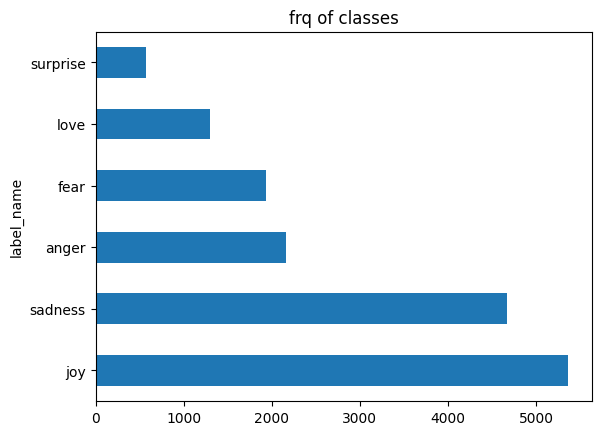

In [ ]:
label_counts.plot.barh()
plt.title("frq of classes")

In [ ]:
#now we know the dataset is imbalanced so we aint gonna get a good performance with traditional ml (ecept we use imbalance lib)

In [ ]:
df['words per tweet'] = df['text'].str.split().apply(len)

<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

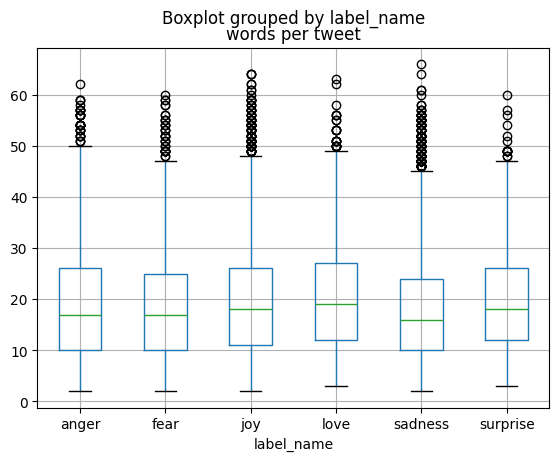

In [ ]:
df.boxplot('words per tweet',by = 'label_name')

not much diffrentiating tokens are also less

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"


tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text = ' i like v'
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2066, 1058, 102], 'attention_mask': [1, 1, 1, 1, 1]}


In [ ]:
emotion.reset_format()

In [ ]:
def tokenize(batch):
    temp = tokenizer(batch['text'],padding = True,truncation = True)
    return temp


print(tokenize(emotion['train'][:2]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
emotions_encoded = emotion.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_encoded

DatasetDict({
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
inputs = tokenizer(text,return_tensors='pt')

In [ ]:
inputs

{'input_ids': tensor([[ 101, 1045, 2066, 1058,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

distilbert can be used in masking also ie context one

In [ ]:
#now we can either fine tune via head or just use direct ml algorithm

In [ ]:
from transformers import AutoModelForSequenceClassification


num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

In [ ]:
#build model

batch_size = 64
model_name = 'distilbert-finetuned-emotional'


training_args = TrainingArguments(output_dir= model_name,
                                  num_train_epochs=5,
                                  learning_rate= 2e-5,
                                  per_device_eval_batch_size = batch_size,
                                  per_device_train_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm = False)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score


In [ ]:
def compute_metrices(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels,preds,average='weighted')
    acc = accuracy_score(labels,preds)
    return {"accuracy":acc,"f1": f1}


In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
from transformers import TrainingArguments, Trainer

# Ensure wandb is disabled in TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    disable_tqdm=False,

)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrices,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)

<ipython-input-31-f793e16cfe5d>:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Step,Training Loss
500,0.684500
1000,0.343700
1500,0.306300
2000,0.245000
2500,0.145300
3000,0.172000
3500,0.141700
4000,0.147800
4500,0.111700
5000,0.110100


TrainOutput(global_step=6000, training_loss=0.2172542266845703, metrics={'train_runtime': 558.0863, 'train_samples_per_second': 86.008, 'train_steps_per_second': 10.751, 'total_flos': 1080514292544000.0, 'train_loss': 0.2172542266845703, 'epoch': 3.0})

In [ ]:

preds_outputs = trainer.predict(emotions_encoded["test"])
preds_outputs.metrics

{'test_loss': 0.22197312116622925,
 'test_accuracy': 0.929,
 'test_f1': 0.9289388287927226,
 'test_runtime': 4.6481,
 'test_samples_per_second': 430.287,
 'test_steps_per_second': 53.786}

In [ ]:
import numpy as np

y_preds = np.argmax(preds_outputs.predictions,axis=1)
y_true = emotions_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classes)
print(classification_report(y_true,y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       581
           1       0.96      0.93      0.95       695
           2       0.80      0.86      0.83       159
           3       0.95      0.90      0.93       275
           4       0.86      0.94      0.90       224
           5       0.85      0.70      0.77        66

    accuracy                           0.93      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
text

' i like v'

In [ ]:


text = "i like v"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoded_text = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**encoded_text)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
classes = ["sadness", "joy", "love", "anger", "fear", "surprise"]
print(classes[pred])

joy


In [ ]:
#yes i feel joy

In [ ]:
model.save_pretrained('/content/my_distilbert_model')
tokenizer.save_pretrained('/content/my_distilbert_model')

('/content/my_distilbert_model/tokenizer_config.json',
 '/content/my_distilbert_model/special_tokens_map.json',
 '/content/my_distilbert_model/vocab.txt',
 '/content/my_distilbert_model/added_tokens.json',
 '/content/my_distilbert_model/tokenizer.json')

In [ ]:
!zip -r model.zip /content/my_distilbert_model


  adding: content/my_distilbert_model/ (stored 0%)
  adding: content/my_distilbert_model/model.safetensors (deflated 8%)
  adding: content/my_distilbert_model/tokenizer_config.json (deflated 75%)
  adding: content/my_distilbert_model/tokenizer.json (deflated 71%)
  adding: content/my_distilbert_model/vocab.txt (deflated 53%)
  adding: content/my_distilbert_model/special_tokens_map.json (deflated 42%)
  adding: content/my_distilbert_model/config.json (deflated 52%)


In [ ]:
print(0)

0
